<a href="https://colab.research.google.com/github/samajain/shopify_summer_2022_DS_challenge/blob/main/Shopify_Summer_2022_Data_Science_Intern_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries:**
---

In [47]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sb

## **Uploading the CSV file:**
---

In [4]:
uploaded = files.upload()

Saving 2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv to 2019 Winter Data Science Intern Challenge Data Set - Sheet1 (1).csv


In [6]:
shopify_ds = pd.read_csv(io.BytesIO(uploaded['2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv']))

## **Data visualization and analysis:**
---

* We begin by looking at the data distribution and analyse metrics associated with the order_amount feature.

In [32]:
shopify_ds.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


### From the above table, we observe the following for the order_amount attribute:
---
1. The standard deviation is large. This clearly indicates that the data is highly spread out indicating chances of outliers i.e. orders with order amount deviating from the normal relatively cheaper sneakers price.

2. Even the minimum and maximum values of \$90 and \$704,000 indicate the large range over which the data points are spread out.

3. 75% of orders have order amounts lower than \$390 whereas the maximum order amount is \$704,000.

#### **With 75% of orders having order amount lower than \$390, we can conclude that the mean value of \$3145.128 doesn't accurately represent the average order value appropriately for the given data set.**

## Let us visualize the data to have a better understanding of the dataset:
---

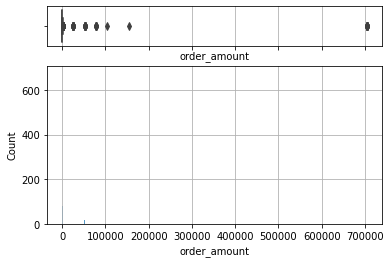

In [73]:
_, (axis_boxplot, axis_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)})

axis_boxplot.grid(True)
axis_hist.grid(True)
sb.boxplot(x=shopify_ds.order_amount, ax=axis_boxplot)
sb.histplot(x=shopify_ds.order_amount, ax=axis_hist)
plt.show()

* From the above plot, we observe that most of the data is distributed around smaller order_amount values and we have a lot of outliers as visible from the boxplot.

* Let us look at the what number of orders have larger than usual order_amounts and the reasons behind them.

In [48]:
shopify_ds.groupby("order_amount").size().reset_index(name="order_count").sort_values(by="order_amount", ascending=False).head(n=15)

,order_amount,order_count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


* We will now look at order_amounts which have unusually high number of order counts.

In [49]:
shopify_ds.loc[shopify_ds["order_amount"].isin([704000, 77175, 51450, 25725])].sort_values(by="order_amount", ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00


Observations from the above table:

* From the above filtered dataset, we observe that for the orders with the highest value of \$704,000, the shop_id and user_id are same denoting that the same user has placed the order with order quantity of 2000 at the same time on different days of the month.

* Similarly other high valued orders of values \$77175, \$51450, \$25725 are either individual orders with 1 order quantity indicating that the ordered sneakers actually do have a high price or instead they are multiple high valued sneakers purchased by the same user. 

#### Now we will visualize how the actual low valued order_amounts are distributed by ignoring the outliers and creating a boxplot:
---

* We will be focusing on data within the 95th percentile in the order_amount range to observe the data distribution.

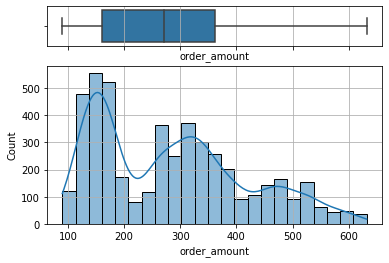

In [70]:
truncated_shopify_ds = shopify_ds[shopify_ds.order_amount < np.percentile(shopify_ds.order_amount,95)]
_, (axis_boxplot, axis_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)})

axis_boxplot.grid(True)
axis_dist.grid(True)
sb.boxplot(x=truncated_shopify_ds.order_amount, ax=axis_boxplot)
sb.histplot(x=truncated_shopify_ds.order_amount, ax=axis_dist, kde=True)
plt.show()

In [65]:
print("The median order value is: $" + str(shopify_ds.order_amount.median()))

The median order value is: $284.0


## Question 1 and their answers for the challenge:
---

Keeping both truncated and untruncated datasets and their corresponding plots, we can conclude that:

a) The data is heavily skewed towards the left denoting that mean would not be a proper measure to determine the average order value. Due to presence of certain orders with very high order_amount, the mean does not accurately indicate the average order value over the dataset.

b) For this dataset, and in general for datasets which are weighed in by outliers and have a distribution which is heavily skewed towards the left, median would be a better indicator of average order value.

c) The median order value which is a better indicator of the average is: \$284.

# Question 2 and their answers:

a) How many orders were shipped by Speedy Express in total?

For solving this, we create a join on the Orders and Shippers tables on the ShipperID and then count those Shippers only which have the Shipper Name as  Speedy Express.
```
SELECT count(*) as NumOrdersBySpeedyExpress FROM Orders inner join Shippers where Orders.ShipperID=Shippers.ShipperID and Shippers.ShipperName="Speedy Express";
```
The above query returns:
```
NumOrdersBySpeedyExpress
54
```

b) What is the last name of the employee with the most orders?

For solving this, we first need to find out employee with maximum number of orders. We do this by first joining the Employees and Orders table on EmployeeID and then 'grouping by' EmployeeID and counting the said number of orders and then further selecting the first entry which represents the Employee with maximum number orders numbers. We finally then extract the lastname from the first entry.

```
Select LastName from (Select Employees.LastName, count(*) as NumberOfOrders from Orders inner join Employees where Orders.EmployeeID=Employees.EmployeeID group by Employees.EmployeeID order by NumberOfOrders DESC limit 1);
```
The above query returns:
```
LastName
Peacock
```

c) What product was ordered the most by customers in Germany?

To solve this, we take four tables into account, namely, Orders, OrderDetails, Customers and Products. The four tables are chosen to first extract CustomersIDs which are from Germany. Those customer IDs are then used to filter the OrderDetails x Orders and finally the filtered Orders are then used to calculate the sum of all order quantity by country and choosing the maximum order quantity from that. We finally select the top most ProductID with max order quantity and then retrieve the following Product Name.

```
with T1 as (Select * From Orders inner join OrderDetails where Orders.OrderID=OrderDetails.OrderID), 
T2 as (select ProductID, sum(Quantity) as MaxQuantityByCountry from T1 inner join Customers where T1.CustomerID=Customers.CustomerID and Customers.Country="Germany" group by ProductID order by MaxQuantityByCountry DESC limit 1)
select ProductName from Products inner join T2 where Products.ProductID=T2.ProductID;
```

The above query returns:
```
ProductName
Boston Crab Meat
```
